In [74]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/iqQgED9vV7k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [44]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Using handwritten data from keras

In [45]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [46]:
len(X_train)

60000

In [47]:
len(X_test)

10000

In [48]:
X_train[0].shape

(28, 28)

In [49]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

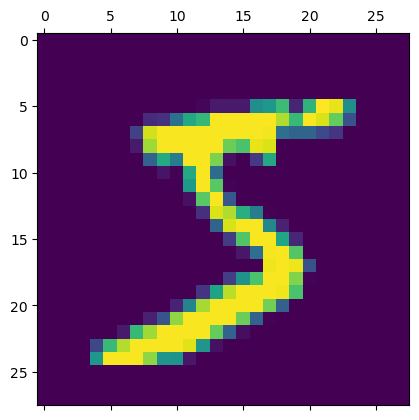

In [50]:
plt.matshow(X_train[0])

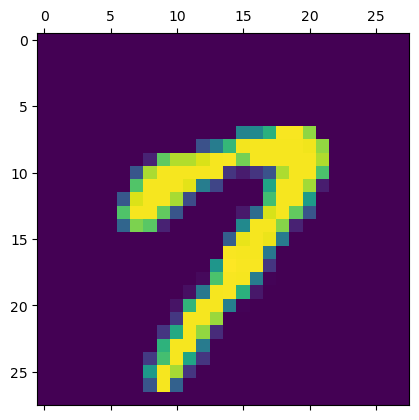

In [51]:
plt.matshow(X_train[15])

In [52]:
Y_train[15]

7

In [53]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the training dataset

* reshape so that the 28x28 features of each of the observation are in one vector i.e.
    * move from 60000*28*28 -> 60000*784

In [54]:
X_train.shape

(60000, 28, 28)

In [55]:
X_train = X_train/ 255
X_test = X_test / 255 # standardizing

In [56]:
X_train_flattened = X_train.reshape(len(X_train),28*28 )
X_test_flattened = X_test.reshape(len(X_test),28*28 )
X_train_flattened.shape

(60000, 784)

In [57]:
X_test_flattened.shape

(10000, 784)

In [58]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Create a simple neural network
    * dense means each feauture is connected to each hidden layer
    * output: 10 (0, 1, .., 9),
    * input the 28*28 =784 flattened features 

In [59]:
model = keras.Sequential([
keras.layers.Dense(10, input_shape= (784, ), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5) # training

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4755 - accuracy: 0.8737
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2670 - accuracy: 0.9248


* evaluate the model on the test dataset

In [60]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2657 - accuracy: 0.9276


[0.2657212018966675, 0.9276000261306763]

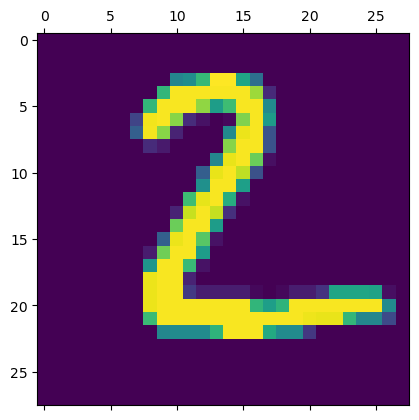

In [67]:
plt.matshow(X_test[1])

In [64]:
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [68]:
Y_predicted[1]

array([3.2706967e-01, 5.3407401e-03, 9.9938381e-01, 3.4858206e-01,
       8.4359975e-10, 8.7065113e-01, 8.8960457e-01, 1.0990370e-12,
       1.6937955e-01, 5.5450999e-09], dtype=float32)

In [69]:
np.argmax(Y_predicted[1])

2

* confusion mmatrix

In [70]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [71]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    5,   10,    2,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    8,  929,   13,   11,    5,   13,    8,   39,    3],
       [   2,    0,   20,  910,    1,   31,    2,   10,   26,    8],
       [   1,    1,    3,    1,  931,    0,   10,    2,   10,   23],
       [   8,    2,    2,   25,   11,  787,   15,    4,   31,    7],
       [   8,    3,    4,    1,    7,   12,  918,    2,    3,    0],
       [   1,    7,   24,    6,   10,    1,    0,  933,    1,   45],
       [   5,    7,    6,   16,   10,   28,    9,    7,  879,    7],
       [   8,    7,    1,    8,   34,    6,    1,   12,    9,  923]])>

Text(95.72222222222221, 0.5, 'Truth')

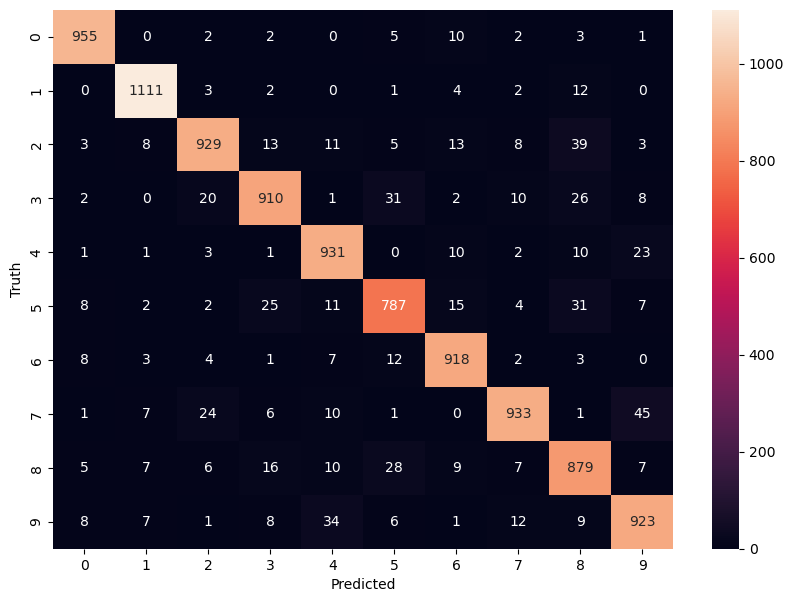

In [72]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add a hidden layer

In [75]:
model = keras.Sequential([ # only 1 hidden layer. You can add some more
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5) # training

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2770 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9842


In [76]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9720


[0.08603779971599579, 0.972000002861023]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

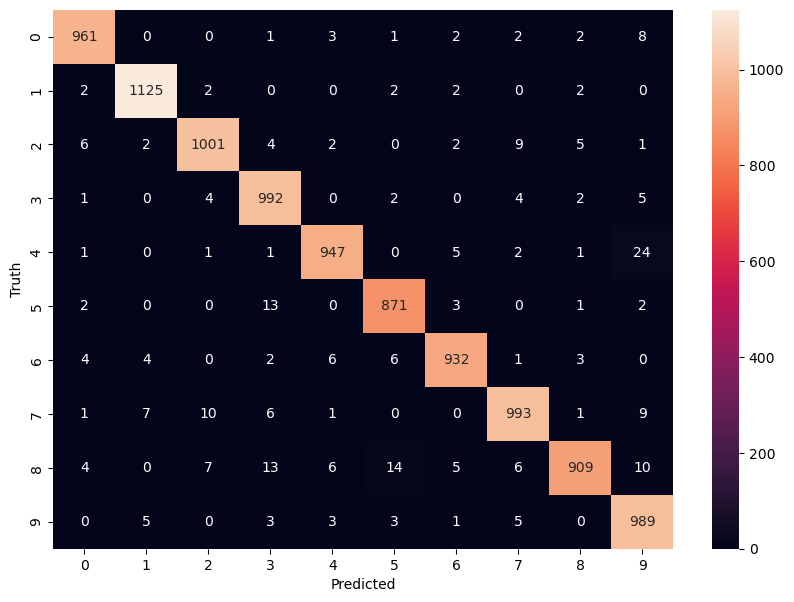

In [77]:

Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels = Y_test, predictions=Y_predicted_labels)
cm

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## flatten automatically from keras

In [78]:
model = keras.Sequential([ # only 1 hidden layer. You can add some more
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2785 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9839


# Activation Functions

In [80]:
import math

def sigmoid(x):
    return 1/ (1 + math.exp(-x))

In [81]:
sigmoid(1246)

1.0

In [82]:
sigmoid(1)

0.7310585786300049

In [83]:
sigmoid(-56)

4.780892883885469e-25

* gradient of sigmoid: tanh

In [90]:
def tanh(x):
    return (math.exp(x) - math.exp(-x))/ (math.exp(x) + math.exp(-x))

In [91]:
tanh(-56)

-1.0

In [92]:
tanh(50)

1.0

* ReLU

In [93]:
def relu(x):
    return max(0, x)

In [94]:
relu(-7)

0

In [95]:
relu(100)

100

* Leaky relu

In [96]:
def leaky_relu(x):
    return max(0.1*x, x)

In [98]:
leaky_relu(-100)

-10.0

In [99]:
leaky_relu(8)

8